In [1]:
import numpy as np 
import pandas as pd 
import os
from random import sample 

import keras
from keras.layers.advanced_activations import LeakyReLU
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras import optimizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib

print(os.listdir("../input"))


Using TensorFlow backend.


['sample_submission.csv', 'test.csv', 'data_description.txt', 'train.csv']


In [2]:
train_csv = pd.read_csv('../input/train.csv')
test_csv = pd.read_csv('../input/test.csv')
sample_submission_csv = pd.read_csv('../input/sample_submission.csv')
print (train_csv.shape)
print (train_csv.shape)
print (sample_submission_csv.shape)

(1460, 81)
(1460, 81)
(1459, 2)


In [3]:
train_csv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_csv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
sample_submission_csv.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [6]:
test_csv["SalePrice"]=sample_submission_csv["SalePrice"]
all_data = pd.concat([train_csv, test_csv], axis=0)
train_data=all_data.loc[:,all_data.dtypes!=object]
train_data=train_data.replace(-1,np.NAN)
train_data.fillna((train_data.mean().round()), inplace=True)
train_data.drop('Id',axis = 1, inplace = True)
print (all_data.shape)

(2919, 81)


In [7]:
train_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0


In [8]:
train_column = list(train_data.columns)

train_matrix = np.matrix(train_data)
train_matrix_norm = MinMaxScaler()
train_matrix_norm.fit(train_matrix)


test_matrix = np.matrix(train_data.drop('SalePrice',axis = 1))
test_matrix_norm = MinMaxScaler()
test_matrix_norm.fit(test_matrix)


y_matrix = np.array(train_data.SalePrice).reshape((2919,1))
y_matrix_norm = MinMaxScaler()
y_matrix_norm.fit(y_matrix)



train = pd.DataFrame(train_matrix_norm.transform(train_matrix),columns = train_column)

In [9]:
X = train.drop(columns=["SalePrice"])
Y = train["SalePrice"]

In [10]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.109641,0.413559,0.0,0.259231,0.333333,0.0,0.50,0.5,0.375,0.333333,0.461538,0.00,0.346154,0.4,0.368280,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.194917,0.000000,0.0,0.174830,0.000000,0.5,0.50,0.0,0.375,0.333333,0.307692,0.25,0.259615,0.4,0.309140,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.123083,0.419370,0.0,0.273549,0.333333,0.0,0.50,0.5,0.375,0.333333,0.307692,0.25,0.339744,0.4,0.408602,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.131695,0.366102,0.0,0.260550,0.333333,0.0,0.25,0.0,0.375,0.333333,0.384615,0.25,0.330128,0.6,0.431452,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,0.090909,0.00
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.170342,0.509927,0.0,0.351168,0.333333,0.0,0.50,0.5,0.500,0.333333,0.538462,0.25,0.336538,0.6,0.561828,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


In [11]:
Y.head()

0    0.241078
1    0.203583
2    0.261908
3    0.145952
4    0.298709
Name: SalePrice, dtype: float64

In [12]:
x_train , x_test , y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

In [13]:
print ('X_train.shape',x_train.shape)
print ('X_test.shape',x_test.shape)
print ('Y_train.shape',y_train.shape)
print ('Y_test.shape',y_test.shape)

X_train.shape (2335, 36)
X_test.shape (584, 36)
Y_train.shape (2335,)
Y_test.shape (584,)


In [14]:

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=36, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam())
              #optimizer=keras.optimizers.Adadelta())


# increase epochs from 100 to 200
history = model.fit(np.array(x_train), np.array(y_train), epochs=100, batch_size=100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2335/2335 [==============================] - 0s 167us/step - loss: 0.0208
Epoch 2/100
2335/2335 [==============================] - 0s 30us/step - loss: 0.0048
Epoch 3/100
2335/2335 [==============================] - 0s 27us/step - loss: 0.0038
Epoch 4/100
2335/2335 [==============================] - 0s 27us/step - loss: 0.0036
Epoch 5/100
2335/2335 [==============================] - 0s 25us/step - loss: 0.0035
Epoch 6/100
2335/2335 [==============================] - 0s 25us/step - loss: 0.0034
Epoch 7/100
2335/2335 [==============================] - 0s 23us/step - loss: 0.0034
Epoch 8/100
2335/2335 [==============================] - 0s 22us/step - loss: 0.0034
Epoch 9/100
2335/2335 [==============================] - 0s 23us/step - loss: 0.0034
Epoch 10/100
2335/2335 [==============================] - 0s 22us/step - loss: 0.0034
Epoch 11/100
2335/2335 [====

Epoch 90/100
2335/2335 [==============================] - 0s 22us/step - loss: 0.0015
Epoch 91/100
2335/2335 [==============================] - 0s 21us/step - loss: 0.0014
Epoch 92/100
2335/2335 [==============================] - 0s 22us/step - loss: 0.0015
Epoch 93/100
2335/2335 [==============================] - 0s 21us/step - loss: 0.0016
Epoch 94/100
2335/2335 [==============================] - 0s 21us/step - loss: 0.0015
Epoch 95/100
2335/2335 [==============================] - 0s 22us/step - loss: 0.0014
Epoch 96/100
2335/2335 [==============================] - 0s 21us/step - loss: 0.0013
Epoch 97/100
2335/2335 [==============================] - 0s 22us/step - loss: 0.0014
Epoch 98/100
2335/2335 [==============================] - 0s 23us/step - loss: 0.0015
Epoch 99/100
2335/2335 [==============================] - 0s 23us/step - loss: 0.0014
Epoch 100/100
2335/2335 [==============================] - 0s 22us/step - loss: 0.0013


dict_keys(['loss'])


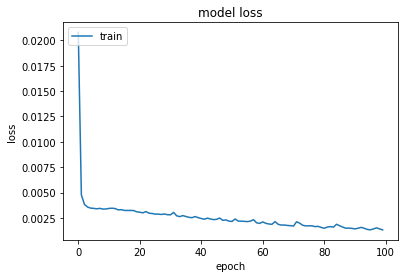

In [15]:
print(history.history.keys())
plt.plot(history.history['loss'])
#plt.plot(history.history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
y = model.predict(np.array(x_test))

In [17]:
predictions = y_matrix_norm.inverse_transform(np.array(y).reshape(584,1))

In [18]:
reality = y_matrix_norm.inverse_transform(np.array(y_test).reshape(584,1))

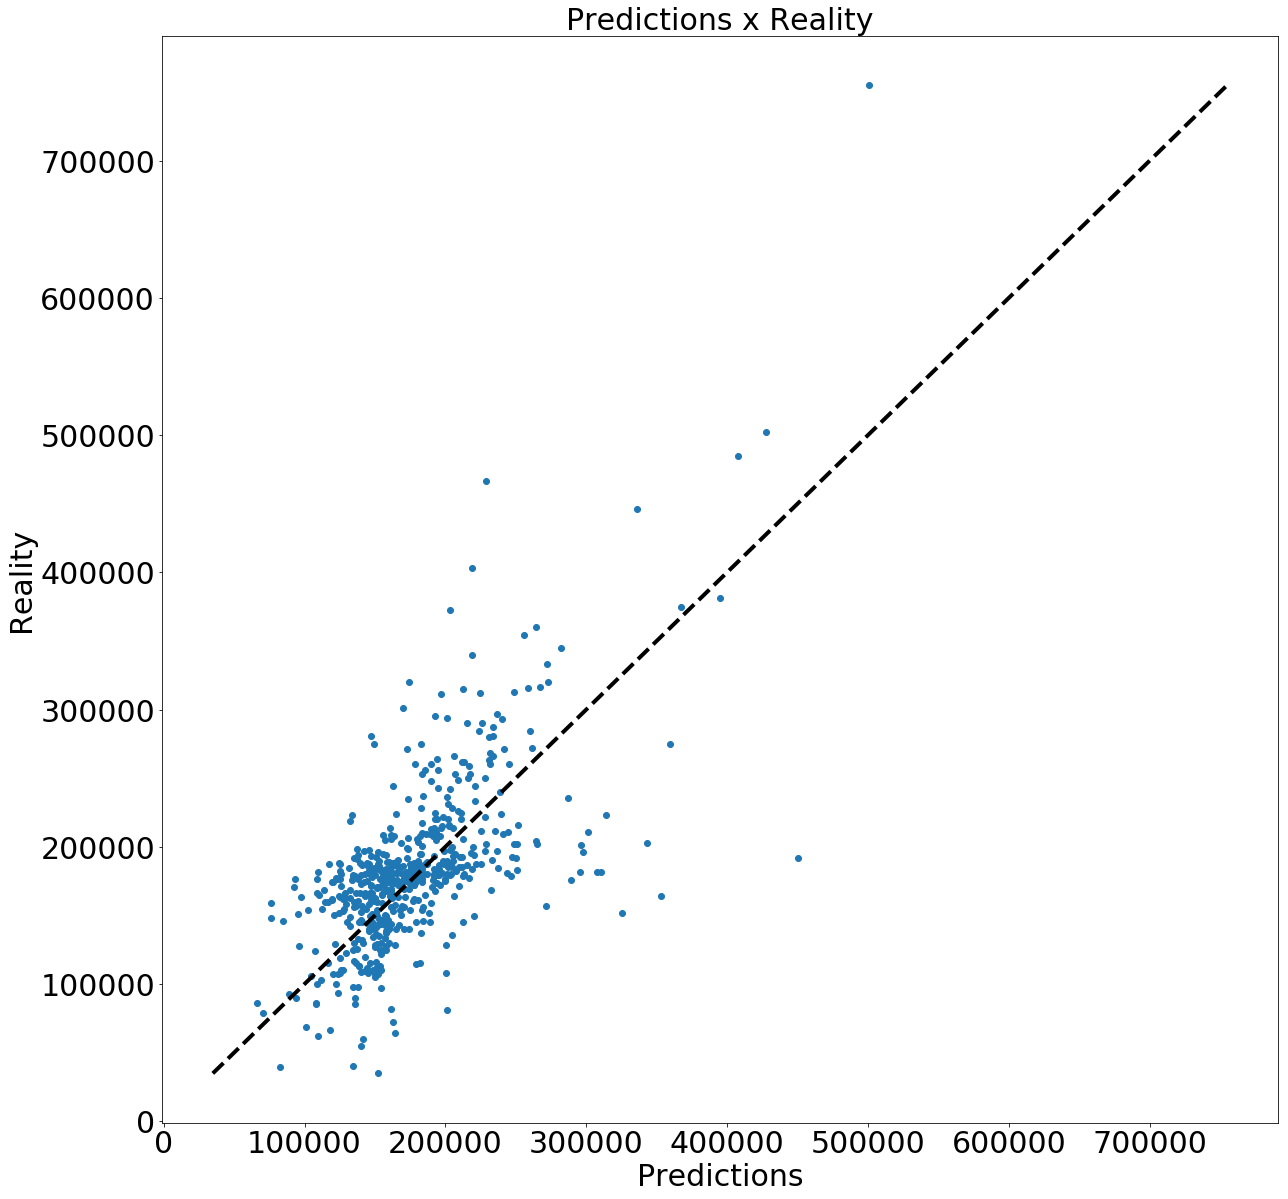

In [19]:
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

plt.figure(figsize=(20,20))
plt.scatter(predictions, reality)
plt.title('Predictions x Reality',fontsize = 30)
plt.xlabel('Predictions',fontsize = 30)
plt.ylabel('Reality',fontsize = 30)
plt.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
plt.show()

In [20]:
error=[]
for i in range (len(reality)):
    error.append(abs(reality[i][0]-predictions[i][0])/reality[i][0]*100)
mean = sum(error)
print ('Hata orani = %',mean/len(error))

Hata orani = % 19.958155918048163
